In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arrow
%matplotlib inline
pd.set_option("max_columns", 500)

In [21]:
permits = pd.read_csv("DOB_Permit_Issuance.csv")

In [25]:
nb_initials   = permits[(permits['Job Type'] == 'NB') &
                        (permits['Permit Type'] == 'NB') &
                        (permits['Permit Status'] == 'ISSUED') & 
                        (permits['Filing Status'] == 'INITIAL') &
                        (permits['Job doc. #'] == 1.0)]

## Inflow

In [53]:
def simple_date_map(val):
    try:
        return np.datetime64(arrow.get(val, "MM/DD/YYYY").datetime)
    except:
        return np.nan

def less_simple_date_map(val):
    try:
        return np.datetime64(arrow.get(val.split(" ")[0], "MM/DD/YYYY").datetime)
    except:
        return np.nan

In [94]:
nb_initials['Issuance Date'] = nb_initials['Issuance Date'].map(less_simple_date_map)
times = nb_initials['Issuance Date']
times = times.value_counts().sort_index()

/Users/Honors/anaconda/envs/nyc-construction-timelines/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/Honors/anaconda/envs/nyc-construction-timelines/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Raw permit data inflow.

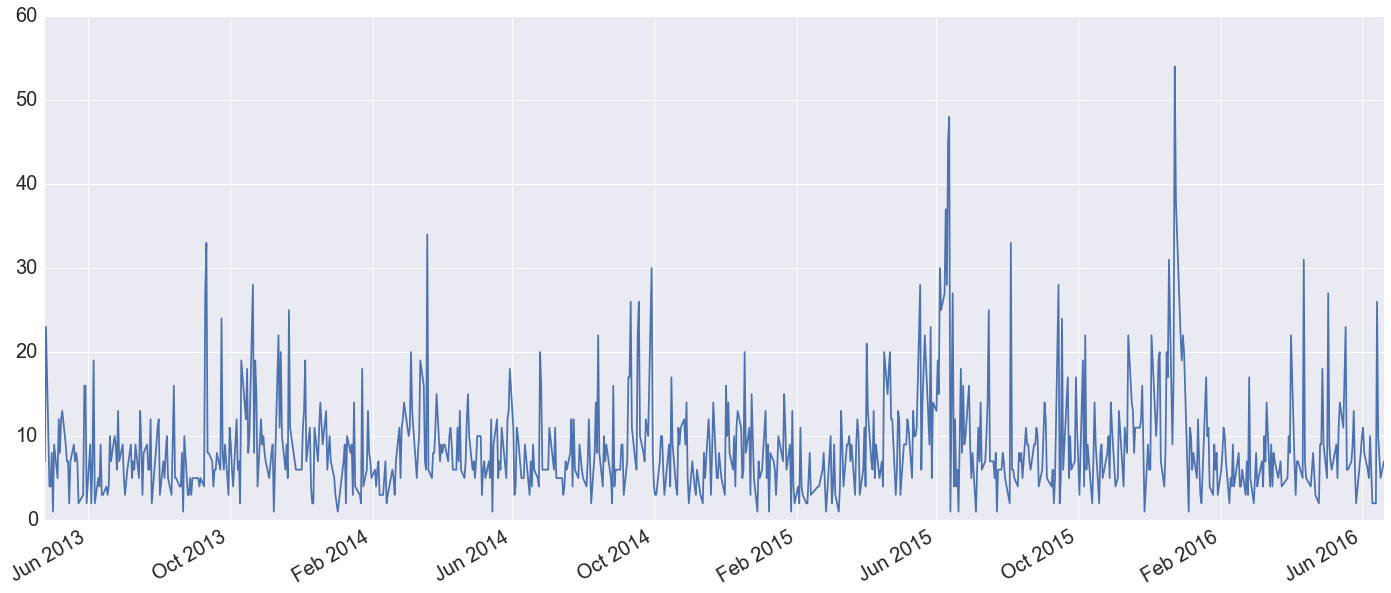

In [120]:
times.plot(figsize=(24, 10), fontsize=20)

Smoothed permit data inflow.

/Users/Honors/anaconda/envs/nyc-construction-timelines/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  if __name__ == '__main__':


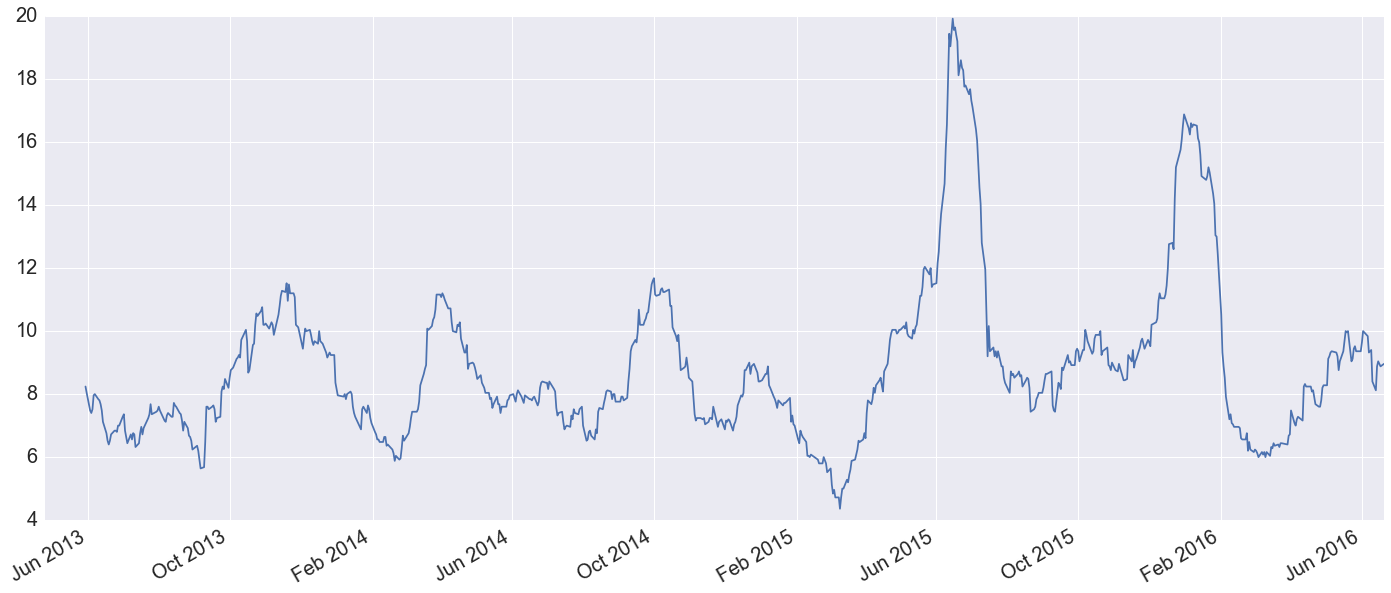

In [119]:
pd.rolling_mean(times, 25).plot(figsize=(24, 10), fontsize=20)

In [106]:
sample_weeks = np.arange(np.datetime64('2013-05'), np.datetime64('2016-06'), step=np.timedelta64(1,'W'))
weekly_observations = []

for start_date in sample_weeks:
    end_date = start_date + np.timedelta64(1,'W')
    observations = nb_initials[(nb_initials['Issuance Date'] < end_date)]
    observations = observations[(observations['Issuance Date'] > start_date)]
    weekly_observations.append(len(observations))

In [111]:
pd.Series(weekly_observations).describe()

count    161.000000
mean      31.919255
std       15.886699
min        3.000000
25%       22.000000
50%       30.000000
75%       36.000000
max      117.000000
dtype: float64

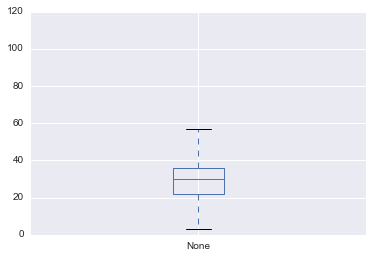

In [112]:
pd.Series(weekly_observations).plot.box()

## Site fill

Site fill the parameter of scoping interest. This is a dummy variable for whether or not 300 cubic yards or more of dirt are moved on a construction site, apparently dating from [this 1992 ordinance](http://www1.nyc.gov/assets/buildings/pdf/pd929.pdf).

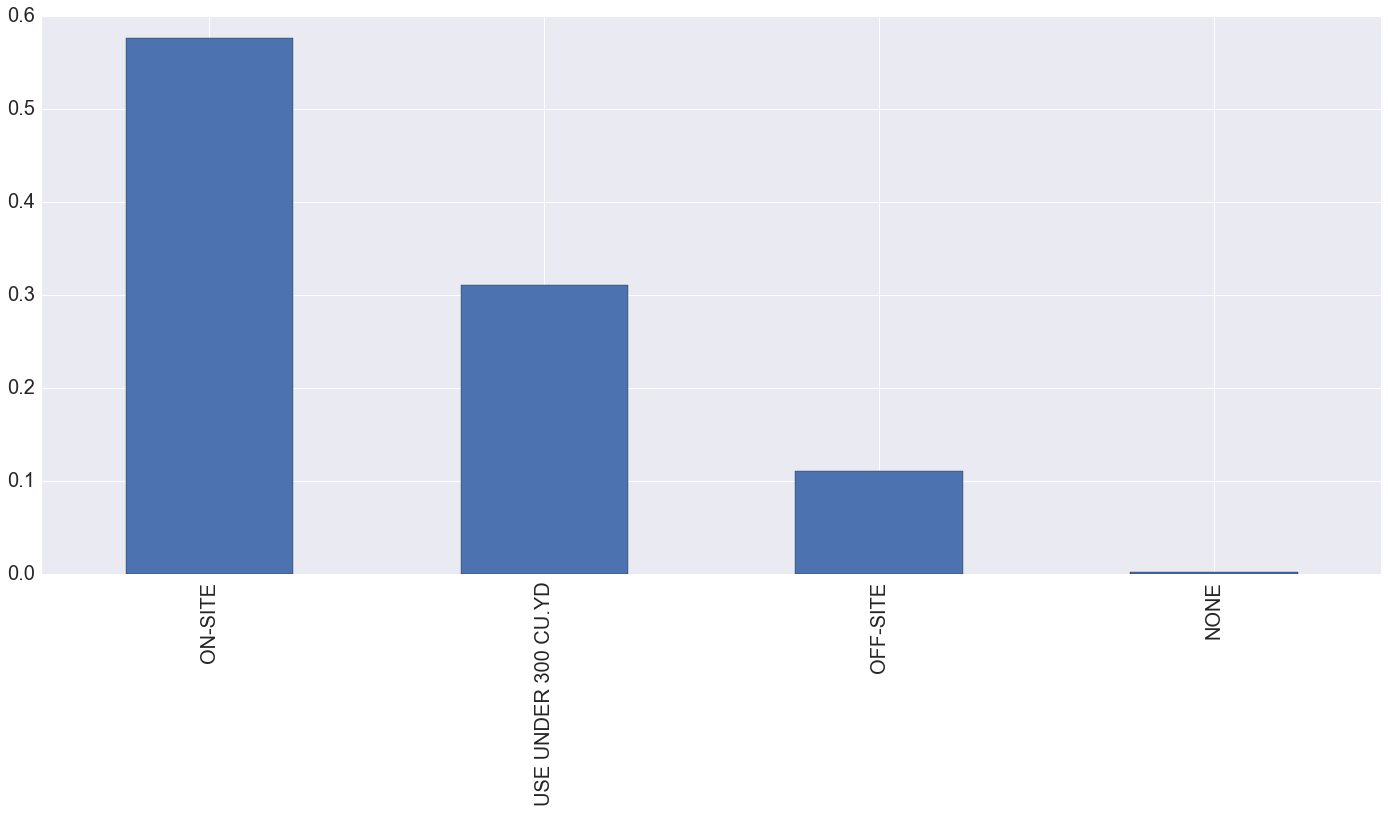

In [138]:
fill_ratios = (nb_initials['Site Fill'].value_counts() / len(nb_initials))
fill_ratios.index = [f.strip() for f in fill_ratios.index]
fill_ratios.plot(kind='bar', figsize=(24, 10), fontsize=20)

In [140]:
fill_ratios.index

Index([u'ON-SITE', u'USE UNDER 300 CU.YD', u'OFF-SITE', u'NONE'], dtype='object')

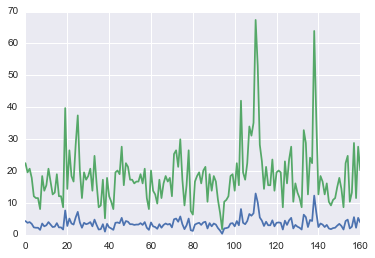

In [153]:
(pd.Series(weekly_observations) * fill_ratios['OFF-SITE']).plot()
(pd.Series(weekly_observations) * fill_ratios['ON-SITE']).plot()